In [1]:
from numpy.linalg import inv
import numpy as np
from scipy.linalg import eig

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

from diffmaps_util import *

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib nbagg

In [4]:
std = 1.
n = 300

In [5]:
z = np.concatenate([np.zeros(n), np.ones(n), np.ones(n)*-1, np.ones(n)*2, np.ones(n)*-2 ]).reshape(-1,1)

In [6]:
X1, _ = make_blobs(n_samples=n, centers=[[2.5,2.5]], cluster_std=std)
X2, _ = make_blobs(n_samples=n, centers=[[4.5,-0.5]], cluster_std=std)
X3, _ = make_blobs(n_samples=n, centers=[[4.5,4.5]], cluster_std=std)
X4, _ = make_blobs(n_samples=n, centers=[[5.5,-2.5]], cluster_std=std)
X5, _ = make_blobs(n_samples=n, centers=[[5.5,5.5]], cluster_std=std)

X = np.concatenate([X1, X2, X3, X4, X5])
X = np.concatenate((X, z), axis=1)

y = np.concatenate([np.ones(n)*0, np.ones(n)*2, np.ones(n)*3, np.ones(n)*4, np.ones(n)*5])

<IPython.core.display.Javascript object>


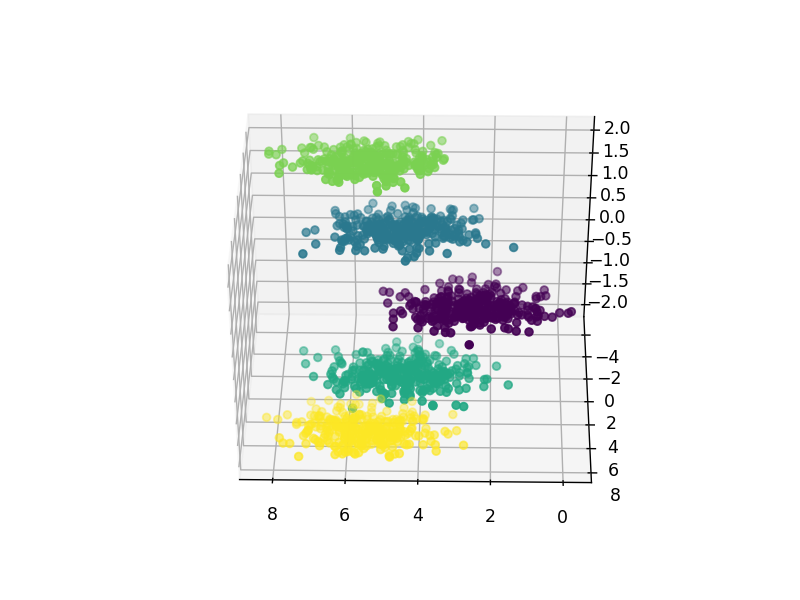

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

In [9]:
L = k(X, 8.)
print 'L shape %s %s' % L.shape
D = diag(L)
print 'D shape %s %s' % D.shape

M = inv(D).dot(L)
print 'M shape %s %s' % M.shape

w, v = eig(M)
w = np.abs(w.real)
v = v.real
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

L shape 1500 1500
D shape 1500 1500
M shape 1500 1500
eigenvalue shape 1500
eigenvector shape 1500 1500


In [10]:
w, v = sort_eigens(w, v)
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

eigenvalue shape 1500
eigenvector shape 1500 1500


In [11]:
psi = v / v[:,0]
psi.shape

(1500L, 1500L)

In [12]:
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape

(1500L, 1499L)

<IPython.core.display.Javascript object>


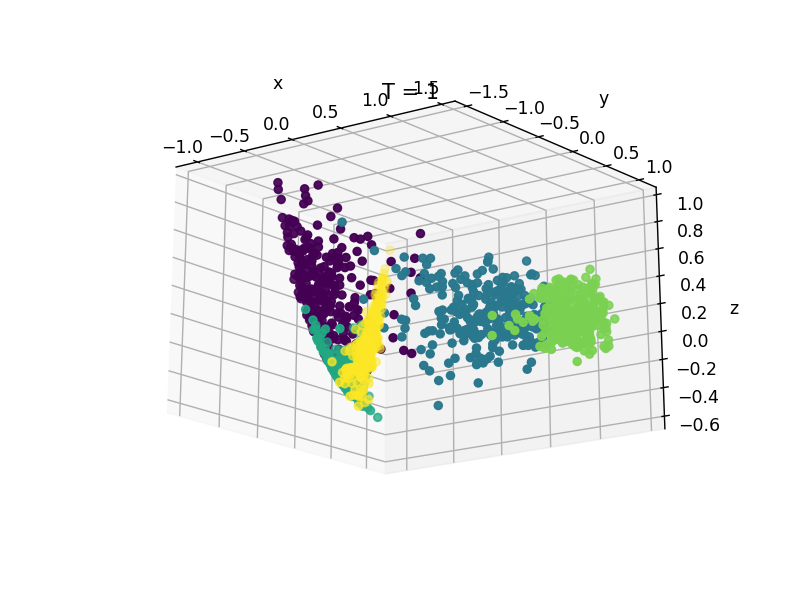

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape
ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,3], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('T = 1')

<IPython.core.display.Javascript object>


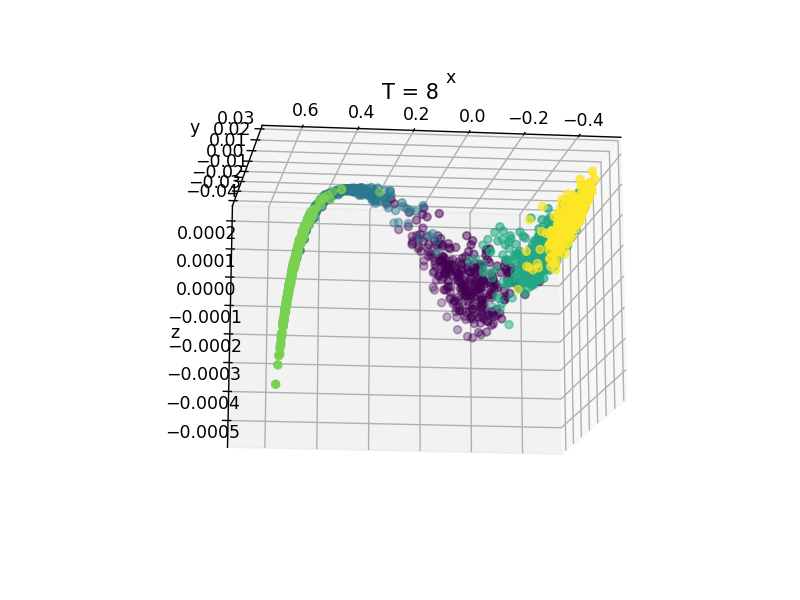

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1)**8 * psi.T).T[:,1:]
diffmap.shape

ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,2], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('T = 8')

<IPython.core.display.Javascript object>


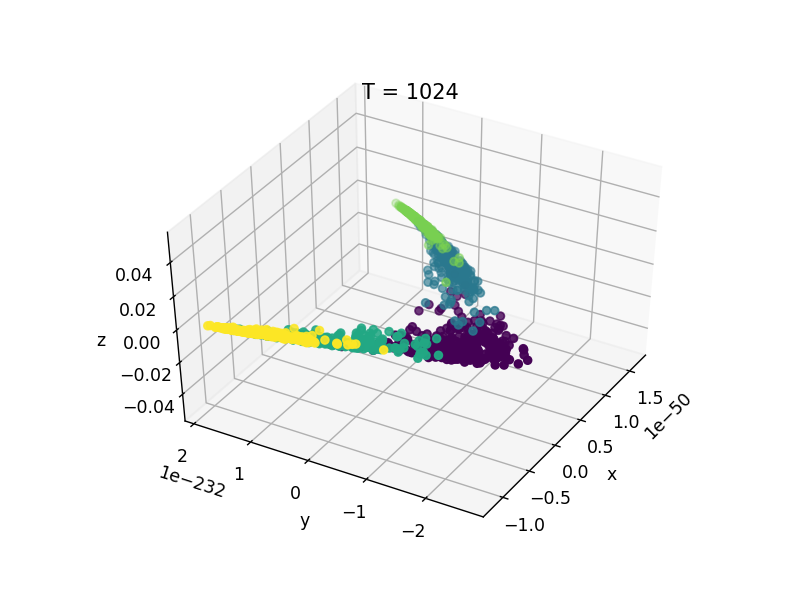

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1)**1024 * psi.T).T[:,1:]
diffmap.shape

ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,2], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('T = 1024')